# Exercise - OOP

In [8]:
class converter:
    def __init__(self, value):
        self._value = value
        
    def __repr__(self):
        return f"Converter(value={self._value})"
        
    def value(self):            #Property
        return self._value      #This is a getter so converter.value will return the value inside. Technically, Python execute converter.value()
    
    def value(self, new_value):             #Setter that checks for if it is an int,float and positive.
        if not isinstance(new_value, (int,float)):
            raise ValueError("Float or int value only")
        elif new_value <0:
            raise ValueError("Number must be positive")
        self._value = new_value
        
    def inch_to_cm(self):
        return self._value *2.54
    
    def cm_to_inch(self):
        return self._value * 1/2.54
    
    def foot_to_meters(self):
        return self._value * 1/3.048
    
    def pound_to_kg(self):
        return self.value * 0.45359
    
    
#Create an object then print said object
a = converter(20)
print(a.cm_to_inch())  
    


# Static class that does not need anything more.
class converter2:
    
    def cm_to_inch(value):
        return value * 1/2.54
    


print(converter2.cm_to_inch(20))

7.874015748031496
7.874015748031496


## Person (*)

Create a class named Person, with parameterized constructor with the following parameters:

name
age
email
Turn name, age, email into properties with following validations in their setters:

name - must be string
age - must be number between 0 and 125
email - must include an @ sign


In [12]:
class Person:
    def __init__(self, name, age, email):
        self._name = name
        self._age = age
        self._email = email
    
    @property
    def name(self):
        return self._name
    
    @name.setter
    def name(self, name):          
        if not isinstance(name, str):
            raise ValueError("Value must be a string!")
    
        self._name = name

    @property
    def age(self):
        return self._age

    @age.setter
    def age(self, age): 
        if not isinstance(age, int):
            raise ValueError("Value must be an int!")
        elif age <= 0 or age > 125:
            raise ValueError("Must be older than 0!")

        self._age = age
    
    @property
    def email(self):
        return self._email

    @email.setter
    def email(self, email): 
        if not isinstance(email, str):
            raise ValueError("Must be an email!")
        if "@" not in email:
            raise ValueError("Invalid format!")

        self._email = email

    def __repr__(self):         # For Debugging
            return f"Person(name={self._name!r}, age={self._age!r}, email={self._email!r})"
        
    def say_hello(self):        # Basic print function
        return f"Hi, my name is {self._name}. I'm {self._age} years old and my email adress is {self._email}"
    
    
P1 = person("Erik",32,"Erik@fakemail.com")

print(P1)
print(P1.say_hello())

    

Person(name='Erik', age=32, email='Erik@fakemail.com')
Hi, my name is Erik. I'm 32 years old and my email adress is Erik@fakemail.com


## Student and Teacher (*)
Create two classes named Student and Teacher that inherits from Person.

The Student class shall have:

study() method that prints out
study...study...study...more study
override say_hello() with the following message:
Yo, I am a student, my name is ..., I am ... years old, my email address is ...  
The Teacher class shall have:

teach() method that prints out
teach...teach...teach...more teaching
Instantiate a Teacher object and a Student object. Call

teach() and say_hello() methods from your Teacher object.
study() and say_hello() methods from your Student object.

In [18]:
class Student(Person):
    def __init__(self, name, age, email):
        super().__init__(name, age, email)
        
    def study():        #use a for loop for DRY
        return " ".join(["study..." for _ in range(4)])
    
    def say_hello(self):
        return f"Yo, iam a student, my name is {self._name}. I'm {self._age} years old and my email adress is {self._email}"
    
    
class Teacher(Person):
    def __init__(self, name, age, email):
        super().__init__(name, age, email)

    def Teach(self):  # use a for loop for DRY
        return " ".join(["Teach..." for _ in range(4)])

    def say_hello(self):
        return f"Yo, iam a student, my name is {self._name}. I'm {self._age} years old and my email adress is {self._email}"
    

s1 = Student("Boris", 20, "Boris@fakemail.com")
t1 = Teacher("Doris", 25, "Doris@fakemail.com")

print(s1.say_hello())
print(t1.Teach())

Yo, iam a student, my name is Boris. I'm 20 years old and my email adress is Boris@fakemail.com
Teach... Teach... Teach... Teach...


## Plotting library (**)
Create a class called PlotAnnotator which takes in a figure and axes instances and exposes a method called arrow, which serves the purpose of creating an annotation to a plot. Note that you might need other methods and/or properties, e.g. something that can return the figure instance.

Also add some settings so that you can reuse it for other plots. For simplicity you could have the settings directly in PlotAnnotator class, or if you'd like you could make use of inheritance or composition to separate concerns and make the classes have single responsibilities.

For example a manual test could look like this:

np.random.seed(42)
x = np.linspace(0, 10, 100) 
y = 2 * x + 5 + np.random.normal(0, 2, size=len(x)) 

annotate = AnnotatePlot(fig, ax)
annotate.arrow("Big dip here", (8, 10), (7.5, 14.8))

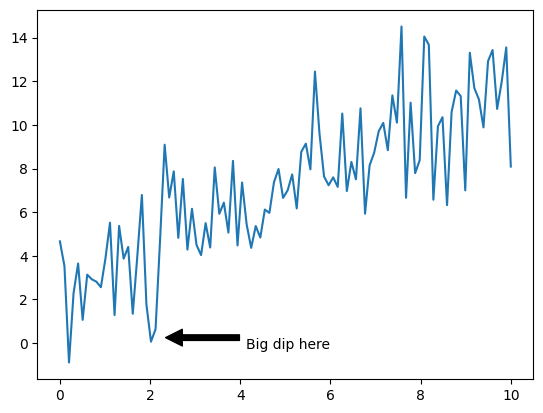

In [62]:
import matplotlib.pyplot as plt
import numpy as np


class PlotAnnotator:
    def __init__(self, fig, ax):
        self.fig = fig
        self.ax = ax

    def arrow(self, text, xytext, xy):
        self.ax.annotate(text, xy=xy, xytext=xytext,
                         arrowprops=dict(facecolor='black', shrink=0.05),
                         horizontalalignment='right', verticalalignment='top')



np.random.seed(10)  #Seed 10 to differentiate.
x = np.linspace(0, 10, 100)
#(Startingpos, endpoint, number of points)

y = 1 * x + 2 + np.random.normal(0, 2, size=len(x))
#Ekvation followed by noise making.

fig, ax = plt.subplots()
ax.plot(x, y)

annotate = PlotAnnotator(fig, ax)
annotate.arrow("Big dip here", (6, 0.25), (2.25, 0.25))
plt.show()



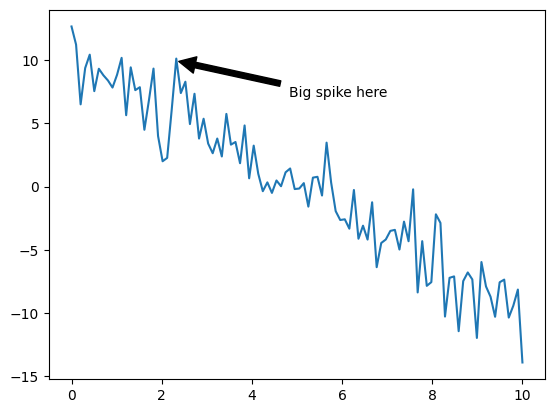

In [63]:
np.random.seed(10)  # Seed 10 to differentiate

x = np.linspace(0, 10, 100)
y = -2 * x + 10 + np.random.normal(0, 2, size=len(x))

fig, ax = plt.subplots()
ax.plot(x, y)

annotate = PlotAnnotator(fig, ax)

annotate.arrow("Big spike here", (7, 8), (2.25, 10))
plt.show()

## Simple Travian (**)
Travian is a strategy game where you collect resources (lumber, clay, iron, crop) to build up a city and spawn troops to pillage and attack other villages. Now we will use OOP to represent a very simple village. It shall have at least these features:

4 fields
1 crop
1 clay
1 lumber
1 iron
Each field produces 4 units of that resource per hour. Just need to represent it, no need to count the time.
Be able to add and subtract resources -> overload the plus and minus operators
There shall be a max capacity of 800 for each resource in the warehouse stocks
__repr__ method to represent the production rate and current stock.
Use composition and/or inheritance in a strategic way.
Feel free to go beyond and implement more features.

In [65]:
class Resource:
    def __init__(self, name, production_rate):
        self.name = name
        self.production_rate = production_rate

    def produce(self):
        return self.production_rate


class Village:
    def __init__(self):
        self.resources = {
            "crop": Resource("crop", 4),
            "clay": Resource("clay", 4),
            "lumber": Resource("lumber", 4),
            "iron": Resource("iron", 4)
        }
        self.warehouse_capacity = 800
        self.stock = {
            "crop": 0,
            "clay": 0,
            "lumber": 0,
            "iron": 0
        }

    def add_resource(self, resource, amount):
        if self.stock[resource] + amount <= self.warehouse_capacity:
            self.stock[resource] += amount
        else:
            print(
                f"Not enough space in the warehouse for {amount} {resource}.")

    def remove_resource(self, resource, amount):
        if self.stock[resource] >= amount:
            self.stock[resource] -= amount
        else:
            print(f"Not enough {resource} in the warehouse.")

    def simulate_time_passing(self, hours):
        for resource_name, resource_obj in self.resources.items():
            production = resource_obj.produce() * hours
            self.add_resource(resource_name, production)

    def __repr__(self):
        production_info = ", ".join(
            [f"{res.name}: {res.production_rate}" for res in self.resources.values()])
        stock_info = ", ".join(
            [f"{res}: {amount}" for res, amount in self.stock.items()])
        return f"Production Rate: [{production_info}] | Current Stock: [{stock_info}]"


def choose_hours():
    while True:
        hours = input("Choose the number of hours to pass (1/3/5): ")
        if hours in ["1", "3", "5"]:
            return int(hours)
        else:
            print("Invalid input. Please choose 1, 3, or 5.")


if __name__ == "__main__":
    my_village = Village()
    print(my_village)

    hours_to_pass = choose_hours()
    my_village.simulate_time_passing(hours_to_pass)
    print(f"Time passed: {hours_to_pass} hours")
    print(my_village)

Production Rate: [crop: 4, clay: 4, lumber: 4, iron: 4] | Current Stock: [crop: 0, clay: 0, lumber: 0, iron: 0]
Time passed: 3 hours
Production Rate: [crop: 4, clay: 4, lumber: 4, iron: 4] | Current Stock: [crop: 12, clay: 12, lumber: 12, iron: 12]
